In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data_22.csv')

In [3]:
df.head()

,Date and Hour,Date,StartHour,EndHour,Source,Production,dayOfYear,dayName,monthName
0,2020-07-22 20:00:00+02:00,22-07-2020,20:00:00,21:00:00,Solar,244,204,Wednesday,July
1,2020-07-23 07:00:00+02:00,23-07-2020,07:00:00,08:00:00,Solar,223,205,Thursday,July
2,2020-07-23 16:00:00+02:00,23-07-2020,16:00:00,17:00:00,Solar,2517,205,Thursday,July
3,2020-07-23 19:00:00+02:00,23-07-2020,19:00:00,20:00:00,Solar,658,205,Thursday,July
4,2020-07-23 23:00:00+02:00,23-07-2020,23:00:00,24:00:00,Solar,0,205,Thursday,July


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2245 entries, 0 to 2244
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date and Hour  2245 non-null   object
 1   Date           2245 non-null   object
 2   StartHour      2245 non-null   object
 3   EndHour        2245 non-null   object
 4   Source         2245 non-null   object
 5   Production     2245 non-null   int64 
 6   dayOfYear      2245 non-null   int64 
 7   dayName        2245 non-null   object
 8   monthName      2245 non-null   object
dtypes: int64(2), object(7)
memory usage: 158.0+ KB


In [5]:
df.columns = df.columns.str.strip()


df['Date and Hour'] = pd.to_datetime(df['Date and Hour'], errors='coerce')

C:\Users\HP\AppData\Local\Temp\ipykernel_1828\463544955.py:4: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Date and Hour'] = pd.to_datetime(df['Date and Hour'], errors='coerce')


In [6]:
df = df.dropna(subset=['Date and Hour', 'Production'])

In [7]:
df['hour'] = df['Date and Hour'].apply(lambda x: x.hour)
df['day'] = df['Date and Hour'].apply(lambda x: x.day)
df['month'] = df['Date and Hour'].apply(lambda x: x.month)

In [8]:
df.drop(columns=['Date', 'StartHour', 'EndHour', 'Date and Hour'], inplace=True, errors='ignore')

In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in ['Source', 'dayName', 'monthName']:
    df[col] = le.fit_transform(df[col])


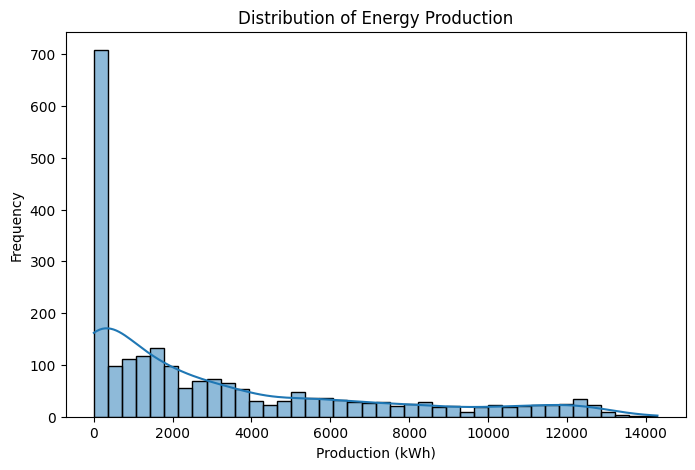

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['Production'], bins=40, kde=True)
plt.title('Distribution of Energy Production')
plt.xlabel('Production (kWh)')
plt.ylabel('Frequency')
plt.show()


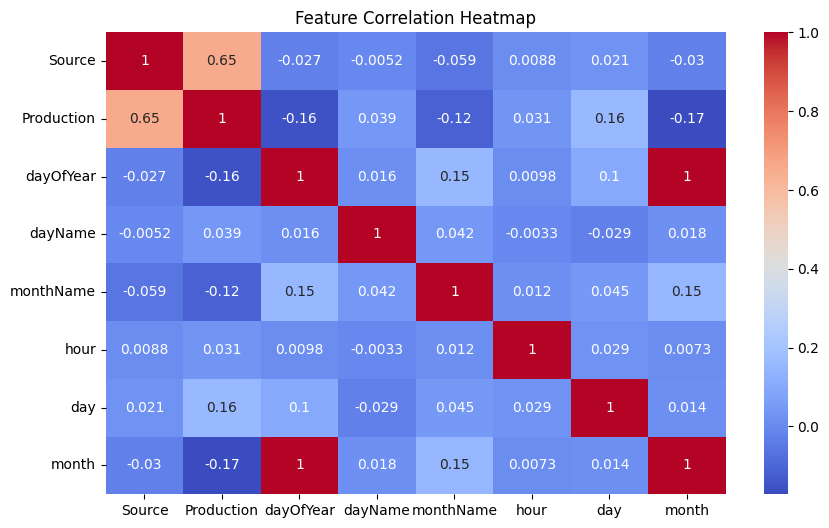

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


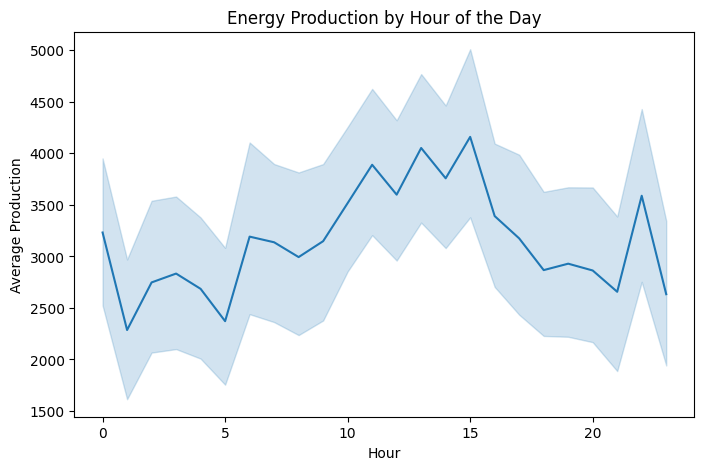

In [12]:
plt.figure(figsize=(8,5))
sns.lineplot(x=df['hour'], y=df['Production'])
plt.title('Energy Production by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Average Production')
plt.show()


In [13]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Production'])
y = df['Production']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [15]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

In [16]:
results = []
preds = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    preds[name] = y_pred
    
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    results.append({'Model': name, 'MAE': mae, 'RMSE': rmse, 'R² Score': r2})

               Model          MAE         RMSE  R² Score
0  Linear Regression  2018.197657  2631.014048  0.484659
1      Decision Tree   444.761693   910.108638  0.938336
2      Random Forest   434.373898   804.427333  0.951825
3  Gradient Boosting  1178.749778  1728.894847  0.777472


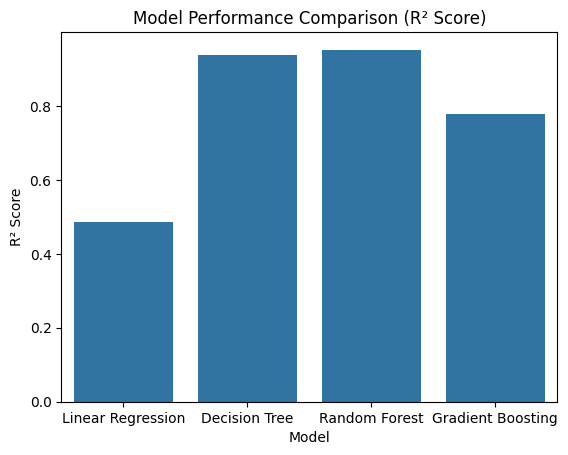

In [17]:
results_df = pd.DataFrame(results)
print(results_df)

sns.barplot(x='Model', y='R² Score', data=results_df)
plt.title('Model Performance Comparison (R² Score)')
plt.ylabel('R² Score')
plt.xlabel('Model')
plt.show()


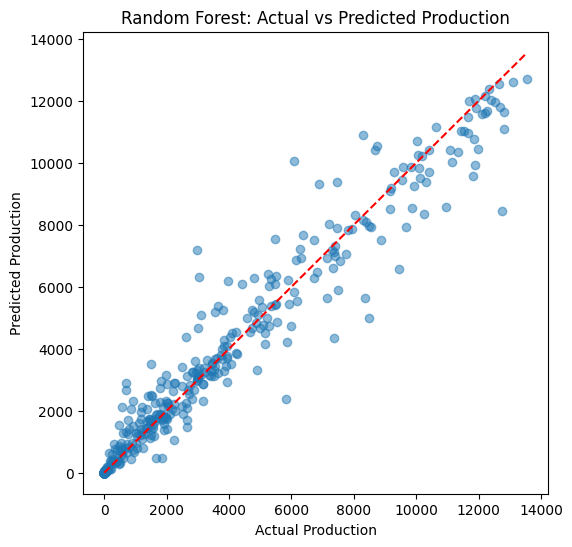

In [18]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, preds['Random Forest'], alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Production')
plt.ylabel('Predicted Production')
plt.title('Random Forest: Actual vs Predicted Production')
plt.show()